##  **기계학습-신경망(CNN) 알아보기**

1. TensorFlow에서 사용하는 CNN 메서드 탐구하기
2. 데이터셋, 데이터 정규화, 모델, loss, accuracy의 개념을 정리하기
3. VGGNet 그림을 보고 직접 만들어보기

# 환경설정
1. 코랩 상단 메뉴에서 런타임 - 런타임 유형 변경을 눌러주세요
2. 하드웨어 가속기를 None에서 GPU로 바꿔주세요.\
(코랩 프로를 결제하셨다면 GPU를 고를 수 있지만 무료로 사용하시는 분들은 T4로 고정되어 있습니다)


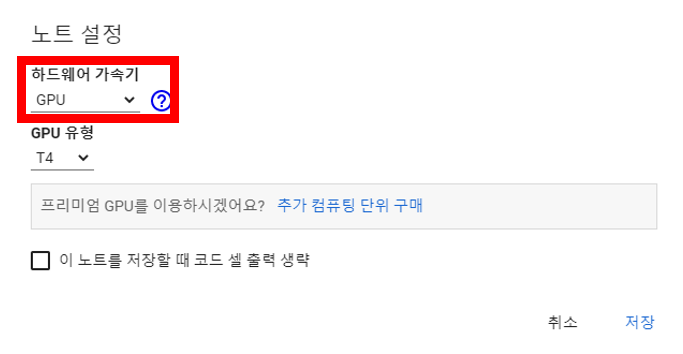

## **[CNN 기반의 숫자 이미지 분류 - MNIST 데이터셋 활용_by Tensorflow]**

## 1.라이브러리 가져오기

In [ ]:
# 인공지능 학습에 필요한 라이브러리 tensorflow 설치 - colab 사용시 실행하지 않아도됨
# !pip install tensorflow
# !pip install numpy
# !pip install matplotlib

In [ ]:
# tensorflow 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


## 2.데이터셋 로드 및 전처리하기

- MNIST는 0부터 9까지 숫자 손글씨로 이루어진 데이터셋으로\
28X28사이즈의 60000의 훈련 데이터와 10000개의 테스트 데이터로 구성되어 있습니다.
    - x_train.shape == (60000, 28, 28)  
    - x_test.shape == (10000, 28, 28)  
    - y_train.shape == (60000,)  
    - y_test.shape == (10000,)   

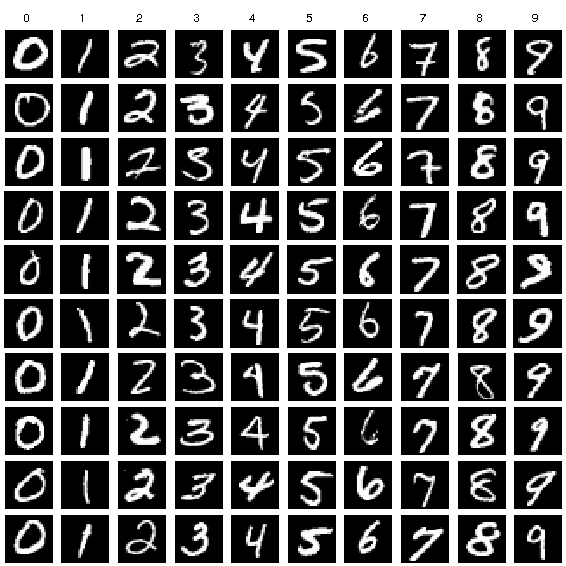

### 1)데이터셋 로드하기

In [ ]:
# Keras API를 활용해서 MNIST 불러오기
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 2)데이터 확인해보기

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

5 입니다.


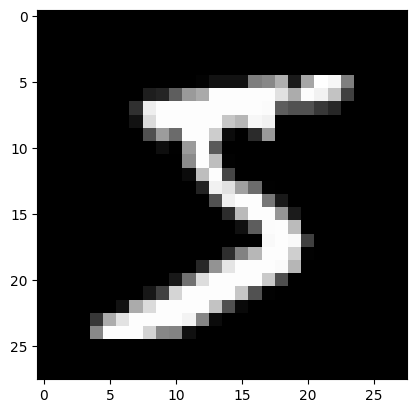

In [ ]:
# 시각화해서 확인하기
plt.imshow(train_images[0],cmap='gray')
print(train_labels[0],'입니다.')

### 3) 데이터 전처리 - 정규화하기
---

- 이미지를 직접 출력한 결과를 보면 0인 경우가 대부분인데 그 다음 심심치 않게 보이는 단위가 3자리수입니다. 0과 3자리수의 크기는 차이가 많이 나는데 이럴 경우 오버피팅이 될 우려가 있어\
- 데이터의 분포를 정규화시켜 scale을 줄이는 데 초점이 맞춰져있습니다.


In [ ]:
print('최소값:',np.min(train_images))
print('최대값:',np.max(train_images))

최소값: 0
최대값: 255


In [ ]:
# 픽셀 값 범위를 [0, 255]에서 [0, 1]로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
print('최소값:',np.min(train_images))
print('최대값:',np.max(train_images))

최소값: 0.0
최대값: 1.0


---
# **[Convolution Neural Network 알아보기]**

- [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

- Convolution Neural Network를 구성하고 있는 매개변수(Arguments)는 filters부터 bias_contraint까지 총 16개로 구성되어 있습니다.

- **filters** : 출력되는 결과의 차원수를 의미합니다.
    -  filter가 영향을 준 부분은 Tuple의 마지막 부분인 channel파트입니다\
즉 filter를 몇개 주는지에 따라서 channel수가 바뀌게 되고 이는 차원수가 바뀌는 것을 의미합니다.

In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu')(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 2, activation = 'relu')(x)
print(y.shape)

(4, 27, 27, 2)


- **kernel_size** : kernel_size가 위에 있는 코드는 3, 아래에 있는 코드는 2로 되어 있습니다. 그래서 output이 바뀐 파트는 Tuple의 2번째, 3번째에 영향을 줍니다.

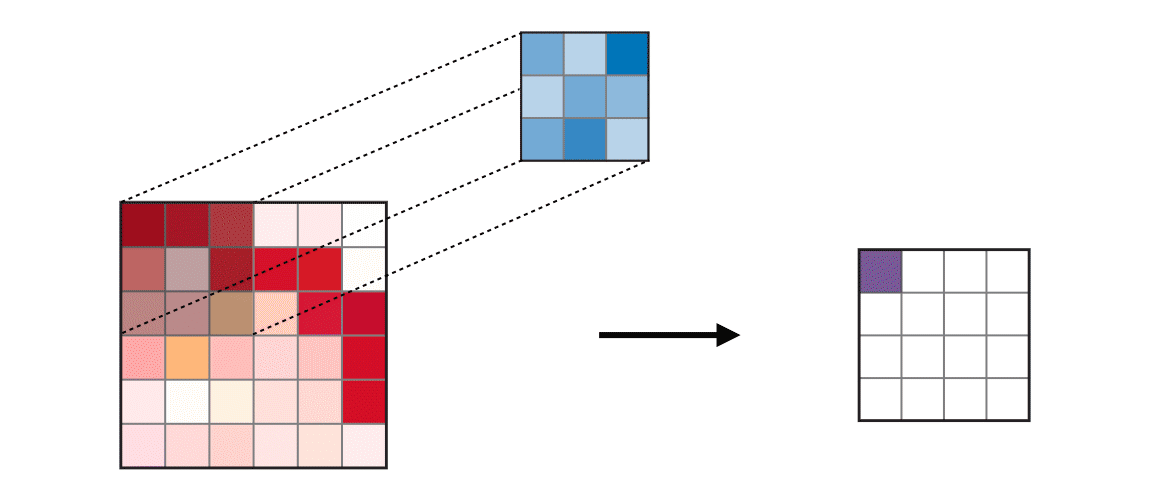

위에 있는 gif를 보게 되면 빨간색 6x6 이미지를 3x3 filter를 이용해 convolution 연산이 진행되고 결과값은 보라색 이미지인 4x4이미지입니다.

해당 방식을 수학적으로 표현하면 다음과 같이 표현가능합니다.

$$ output = input - filter + 1 $$

- **strides**\ : strides는 filter 이동을 1개씩 가는 것이 아니라 n개씩 가도록 설정하는 매개변수입니다.

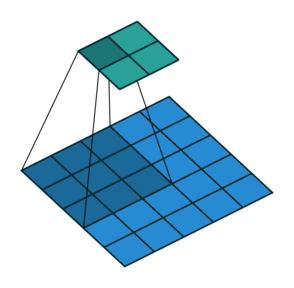


위에 있는 그림을 보게 되면 5x5 이미지를 3x3 filter가 2개씩 가도록 설정되어 있습니다.\
해당 설정을 하지 않았다면 output의 크기는 3x3이 되어야 하지만 stride가 설정되면서 2x2로 출력값이 나오게 되었습니다. 해당 내용도 코드로도 확인해보도록 하겠습니다.

In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu')(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, strides = 2, activation = 'relu')(x)
print(y.shape)

(4, 13, 13, 2)


stride가 적용되면 실제 output의 크기는 step만큼 나누어져서 계산됩니다. \
그렇기에 stride가 적용된 output_shape은 다음과 같습니다.

$$
output = \frac{(input-filter)}{stride} + 1
$$


- **padding**
    - padding을 하는 이유는 filter는 가운데 파트는 몇번씩 거치면서 계산되지만 끝에 있는 edge부분은 한번밖에 계산되지 않습니다. 그렇기에 padding을 주어서 edge를 잘 볼 수 있게 하는 장치입니다.

    - TensorFlow의 경우 padding은 '자동'으로 적용하며 'valid'는 적용하지 않은 것이며 'same'은 padding이 적용된 상황입니다.

In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu')(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters = 2, kernel_size = 3, activation = 'relu', padding = 'same')(x)
print(y.shape)

(4, 28, 28, 2)


padding이 적용되었을 때 Output shape은 다음과 같이 계산됩니다.

$$
output = \frac{(input - filter + 2*padding)}{stride}+1
$$


- **input_shape** : 처음 layer를 쌓을 떄 설정해주는 값이며
- **activation** : convolution 연산 이후 활성화함수를 고르는 매개변수입니다.
---

## 3.모델 구성하기

- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

In [ ]:
from tensorflow import keras

# 모델 아키텍처 정의
model = keras.Sequential([
    # 입력 레이어 정의
    keras.layers.Input(shape=(28, 28, 1)),
    # 첫 번째 Convolution layer를 정의
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    # 두 번째MaxPooling2D layer 추가 (pooling size: (2, 2))
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 두 번째 Convolution layer 추가 (output 차원수: 32, filter 사이즈: 3, 활성화 함수: relu)
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    # 두 번째 MaxPooling2D layer 추가
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 차원을 줄이는 Flatten layer 추가
    keras.layers.Flatten(),

    # Dense layer 추가 (output unit: 32, 활성화 함수: relu)
    keras.layers.Dense(32, activation='relu'),

    # 최종 Dense layer 추가 (output unit: 10, 활성화 함수: softmax)
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

## 4.모델 컴파일하기

In [ ]:
# 모델 컴파일. 손실 함수, 옵티마이저, 메트릭 정의
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5.모델 학습하기

In [ ]:
# 훈련 데이터를 이용해 모델 학습
model.fit(train_images, train_labels, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1889 - accuracy: 0.9420
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0335 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

## 6.모델 테스트하기

In [ ]:
# 테스트 데이터로 모델 평가. 손실과 정확도 출력
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 loss:', test_loss, '테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.0379 - accuracy: 0.9897 - 802ms/epoch - 3ms/step
테스트 loss: 0.037928421050310135 테스트 정확도: 0.9897000193595886


## 7.모델 예측하고 결과 시각화하기

313/313 [==============================] - 1s 2ms/step


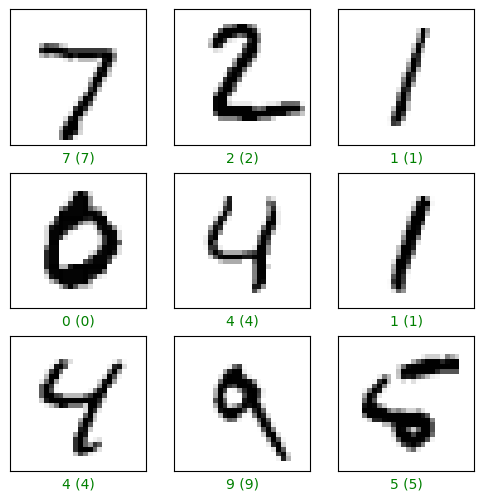

In [ ]:
# 예측 결과 시각화
predictions = model.predict(test_images)
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()

# **[Fashin MNIST를 활용한 CNN 모델 만들고 학습해보기]**  
---

In [ ]:
#Fashion MNIST를 직접 불러오자! (참고자료 : https://keras.io/api/datasets/fashion_mnist/)
fashion_mnist = #[[YOUR CODE]]
(train_fashion_images, train_fashion_labels), (test_fashion_images, test_fashion_labels) = fashion_mnist.load_data()


In [ ]:
#label이 숫자로 되어 있으니 영어로 된 리스트를 드리겠습니다.
label_list = ['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

Ankle_boot 입니다.


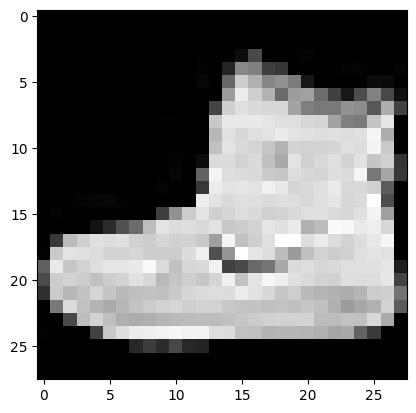

In [ ]:
# 불러온 데이터를 시각화해주세요.
plt.imshow(#[[YOUR CODE]])
print('label_list : ', #[[YOUR CODE]])


In [ ]:
# 픽셀 값 범위를 [0, 255]에서 [0, 1]로 정규화를 진행해주세요!
train_fashion_images = #[[YOUR CODE]]
test_fashion_images = #[[YOUR CODE]]

- model.summary()를 진행했을때 아래와 같은 내용으로 나오게끔 만들어주세요!
- VGGNet 모델

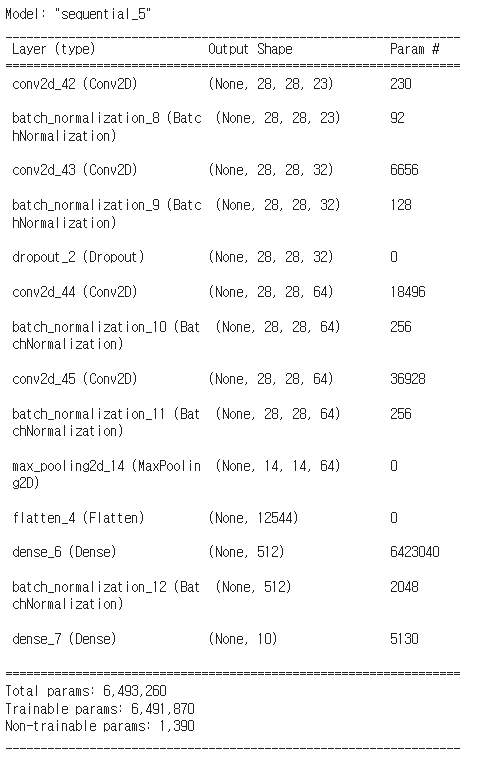

In [ ]:
# Summary를 보고 모델 만들기
# 마지막 Dense는 softmax가 활성화함수이며 나머지 layer들은 relu입니다.
# 모든 CNN은 padding을 갖고 있습니다.
# 참고자료 : (https://keras.io/api/layers/normalization_layers/batch_normalization/)
# 참고자료 : (https://keras.io/api/layers/regularization_layers/dropout/)

model = tf.keras.Sequential()
#[[YOUR CODE]]







In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 23)        230       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 23)       92        
 hNormalization)                                                 
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        6656      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)       

In [ ]:
# 모델을 컴파일하고 학습시켜주세요.
# 옵티마이저는 'adam'
# loss는 SparseCategoricalCrossentropy
# 평가지표는 정확도
# epoch은 5

#[[YOUR CODE]]

Epoch 1/5
1875/1875 [==============================] - 24s 11ms/step - loss: 0.3561 - accuracy: 0.8741
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2394 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1973 - accuracy: 0.9280
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1638 - accuracy: 0.9397
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1256 - accuracy: 0.9546


In [ ]:
# 테스트 데이터로 모델 평가. 손실과 정확도 출력
test_loss, test_acc = #[[YOUR CODE]]
print('테스트 loss:', test_loss, '테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2243 - accuracy: 0.9294 - 1s/epoch - 4ms/step
테스트 loss: 0.22425933182239532 테스트 정확도: 0.9294000267982483


313/313 [==============================] - 2s 6ms/step


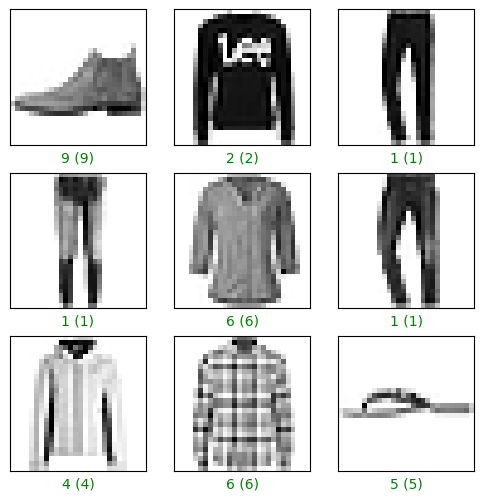

In [ ]:
# 위의 내용을 바탕으로 예측 결과 시각화
#[[YOUR CODE]]